In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final_df.csv")
columns_to_drop = ['park_count', 'supermarket_count']

df = df.drop(columns=columns_to_drop)

/tmp/ipykernel_227/834797896.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_df.csv")


# Первbxная предобработка

In [3]:
df

area floor rooms  complex  \
0      73.20     7     2     МИRA   
1      91.90     8     3     МИRA   
2      46.66     8     1     МИRA   
3      69.82     9     2     МИRA   
4      84.43     9     3     МИRA   
...      ...   ...   ...      ...   
30440  84.80  14.0   3.0  Voxhall   
30441  48.00  25.0   3.0   Shagal   
30442  60.30  20.0   3.0   Shagal   
30443  36.10  11.0   2.0  Десятка   
30444  51.20  21.0   3.0   Shagal   

                                     description_complex developer  \
0      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
1      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
2      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
3      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
4      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
...                                                  ...       ...   
30440  Voxhall — новый жилой комплекс бизнес-класса, ...    etalon   
30441  Расположен в престижном Даниловском районе и у...    etalon   
30442  Расположен в престижном Даниловском районе и у...    etalon   
30443  Жилой комплекс в тихом районе подмосковного Ра...    etalon   
30444  Расположен в престижном Даниловском районе и у...    etalon   

                                                address       price  \
0                           Москва, Проспект Мира, 186а  38195760.0   
1                           Москва, Проспект Мира, 186а  43009200.0   
2                           Москва, Проспект Мира, 186а  24795124.0   
3                           Москва, Проспект Мира, 186а  33143554.0   
4                           Москва, Проспект Мира, 186а  38652054.0   
...                                                 ...         ...   
30440                    ул. Летниковская, вл. 4, вл. 6  82181163.0   
30441         г. Москва, ЮАО, ул. Автозаводская, вл. 23  44209084.0   
30442         г. Москва, ЮАО, ул. Автозаводская, вл. 23  56471327.0   
30443  Московская область, г. Раменское, микрорайон №10   7237623.0   
30444         г. Москва, ЮАО, ул. Автозаводская, вл. 23  42710405.0   

                          building         check_in  ...  restaurant_count  \
0                              NaN              NaN  ...                25   
1                              NaN              NaN  ...                25   
2                              NaN              NaN  ...                25   
3                              NaN              NaN  ...                25   
4                              NaN              NaN  ...                25   
...                            ...              ...  ...               ...   
30440                     Корпус 2              -7%  ...               159   
30441  3 очередь, 5 этап, корпус 5  IV квартал 2026  ...                49   
30442  2 очередь, 2 этап, корпус 3  II квартал 2025  ...                49   
30443                     Корпус 7             -15%  ...                 2   
30444  3 очередь, 5 этап, корпус 4  IV квартал 2026  ...                49   

       nearest_metro_name  nearest_metro_type nearest_metro_lat  \
0                    ВДНХ               metro         55.820955   
1                    ВДНХ               metro         55.820955   
2                    ВДНХ               metro         55.820955   
3                    ВДНХ               metro         55.820955   
4                    ВДНХ               metro         55.820955   
...                   ...                 ...               ...   
30440        Серпуховская               metro         55.727953   
30441            Тульская               metro         55.708665   
30442            Тульская               metro         55.708665   
30443                 NaN                 NaN               NaN   
30444            Тульская               metro         55.708665   

      nearest_metro_lon nearest_metro_distance_km  nearest_metro_time_min  \
0             37.641201                    2.3160 

### Анализ выбросов

In [4]:
# Calculate Q1, Q3, and IQR for price_per_meter
q1_meter = df['price_per_meter'].quantile(0.25)
q3_meter = df['price_per_meter'].quantile(0.75)
iqr_meter = q3_meter - q1_meter

# Calculate lower and upper bounds for outliers
lower_bound_meter = q1_meter - 1.5 * iqr_meter
upper_bound_meter = q3_meter + 1.5 * iqr_meter

# Calculate the number of outliers
outliers_count = len(df[(df['price_per_meter'] < lower_bound_meter) | (df['price_per_meter'] > upper_bound_meter)])

outliers_count

609

Количество выбросов по правилу 3 IQR для колонки `price_per_meter` составляет 609.

Список жилых комплексов (ЖК) и застройщиков, по которым наблюдаются выбросы значений `price_per_meter`

In [5]:
outlier_data = df[(df['price_per_meter'] < lower_bound_meter) | (df['price_per_meter'] > upper_bound_meter)]
outlier_counts = outlier_data.groupby(['complex', 'developer']).size().reset_index(name='outlier_count')
outlier_counts

complex developer  outlier_count
0            Famous  MR Group             10
1           Foriver    Инград             29
2              JOIS  MR Group             21
3              LUCE  MR Group              2
4      Mariinn Park    etalon              1
5               Mod  MR Group             28
6   Nagatino i-Land    etalon              2
7            Nicole  MR Group            145
8             Noble  MR Group              1
9          Riversky    Инград             20
10            SLAVA  MR Group            100
11           Shagal    etalon             21
12      Symphony 34  MR Group            100
13             VEER  MR Group             11
14          Voxhall    etalon             49
15     Дом на Зорге      a101              4
16             МИRA  MR Group              8
17           Остров  Donstroi             28
18  Павелецкая Сити  MR Group             27
19          Событие  Donstroi              2

### Удалим выбросы

In [6]:
# Remove outliers from the dataframe
df = df[(df['price_per_meter'] >= lower_bound_meter) & (df['price_per_meter'] <= upper_bound_meter)]

In [7]:
df

area floor rooms  complex  \
0      73.20     7     2     МИRA   
1      91.90     8     3     МИRA   
2      46.66     8     1     МИRA   
3      69.82     9     2     МИRA   
4      84.43     9     3     МИRA   
...      ...   ...   ...      ...   
30440  84.80  14.0   3.0  Voxhall   
30441  48.00  25.0   3.0   Shagal   
30442  60.30  20.0   3.0   Shagal   
30443  36.10  11.0   2.0  Десятка   
30444  51.20  21.0   3.0   Shagal   

                                     description_complex developer  \
0      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
1      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
2      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
3      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
4      Премиальный дом МИRA — статусный жилой комплек...  MR Group   
...                                                  ...       ...   
30440  Voxhall — новый жилой комплекс бизнес-класса, ...    etalon   
30441  Расположен в престижном Даниловском районе и у...    etalon   
30442  Расположен в престижном Даниловском районе и у...    etalon   
30443  Жилой комплекс в тихом районе подмосковного Ра...    etalon   
30444  Расположен в престижном Даниловском районе и у...    etalon   

                                                address       price  \
0                           Москва, Проспект Мира, 186а  38195760.0   
1                           Москва, Проспект Мира, 186а  43009200.0   
2                           Москва, Проспект Мира, 186а  24795124.0   
3                           Москва, Проспект Мира, 186а  33143554.0   
4                           Москва, Проспект Мира, 186а  38652054.0   
...                                                 ...         ...   
30440                    ул. Летниковская, вл. 4, вл. 6  82181163.0   
30441         г. Москва, ЮАО, ул. Автозаводская, вл. 23  44209084.0   
30442         г. Москва, ЮАО, ул. Автозаводская, вл. 23  56471327.0   
30443  Московская область, г. Раменское, микрорайон №10   7237623.0   
30444         г. Москва, ЮАО, ул. Автозаводская, вл. 23  42710405.0   

                          building         check_in  ...  restaurant_count  \
0                              NaN              NaN  ...                25   
1                              NaN              NaN  ...                25   
2                              NaN              NaN  ...                25   
3                              NaN              NaN  ...                25   
4                              NaN              NaN  ...                25   
...                            ...              ...  ...               ...   
30440                     Корпус 2              -7%  ...               159   
30441  3 очередь, 5 этап, корпус 5  IV квартал 2026  ...                49   
30442  2 очередь, 2 этап, корпус 3  II квартал 2025  ...                49   
30443                     Корпус 7             -15%  ...                 2   
30444  3 очередь, 5 этап, корпус 4  IV квартал 2026  ...                49   

       nearest_metro_name  nearest_metro_type nearest_metro_lat  \
0                    ВДНХ               metro         55.820955   
1                    ВДНХ               metro         55.820955   
2                    ВДНХ               metro         55.820955   
3                    ВДНХ               metro         55.820955   
4                    ВДНХ               metro         55.820955   
...                   ...                 ...               ...   
30440        Серпуховская               metro         55.727953   
30441            Тульская               metro         55.708665   
30442            Тульская               metro         55.708665   
30443                 NaN                 NaN               NaN   
30444            Тульская               metro         55.708665   

      nearest_metro_lon nearest_metro_distance_km  nearest_metro_time_min  \
0             37.641201                    2.3160 

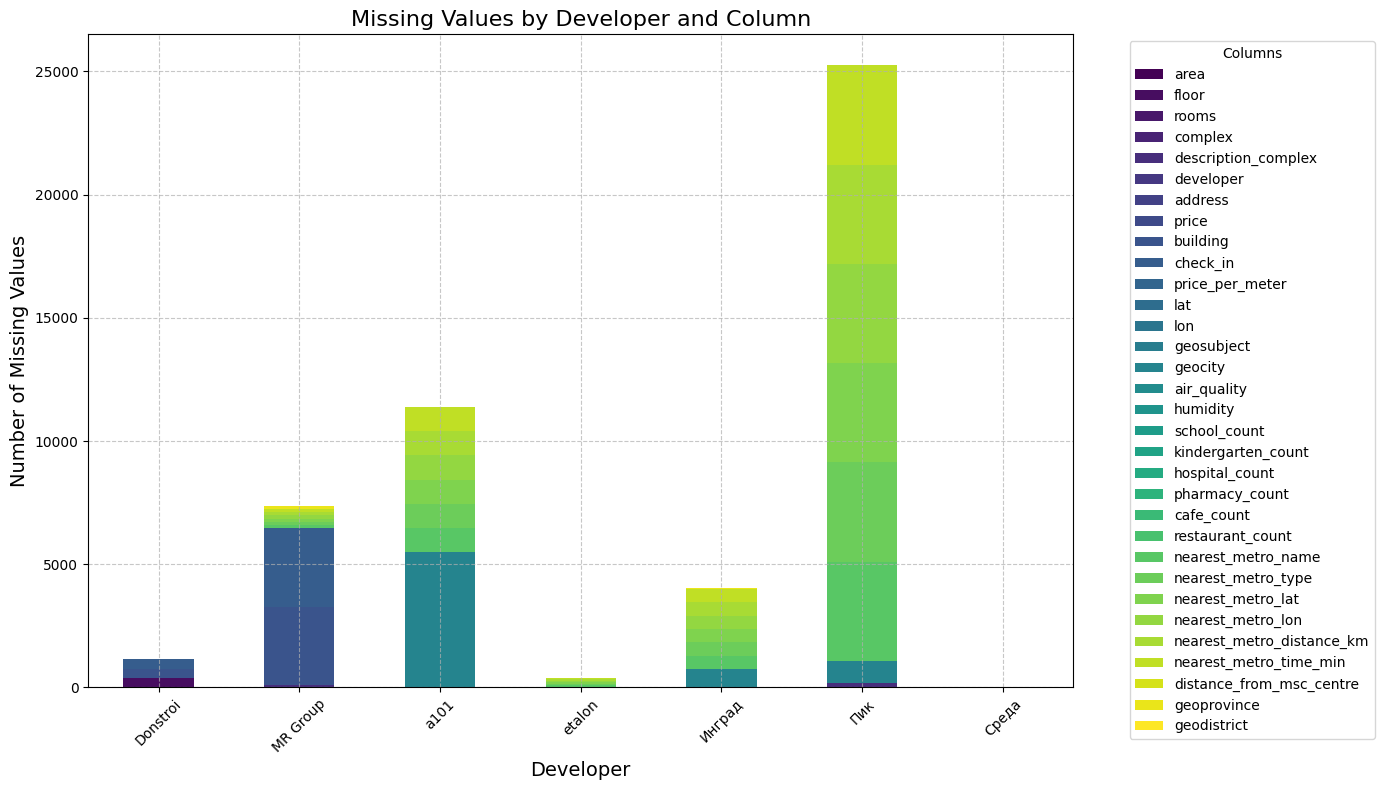

In [8]:
# Подсчет пропусков по каждому застройщику и столбцу
missing_by_developer_column = df.groupby('developer').apply(lambda x: x.isnull().sum())

# Визуализация stacked bar plot
missing_by_developer_column.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Missing Values by Developer and Column', fontsize=16)
plt.xlabel('Developer', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Количество дубликатов: 2957


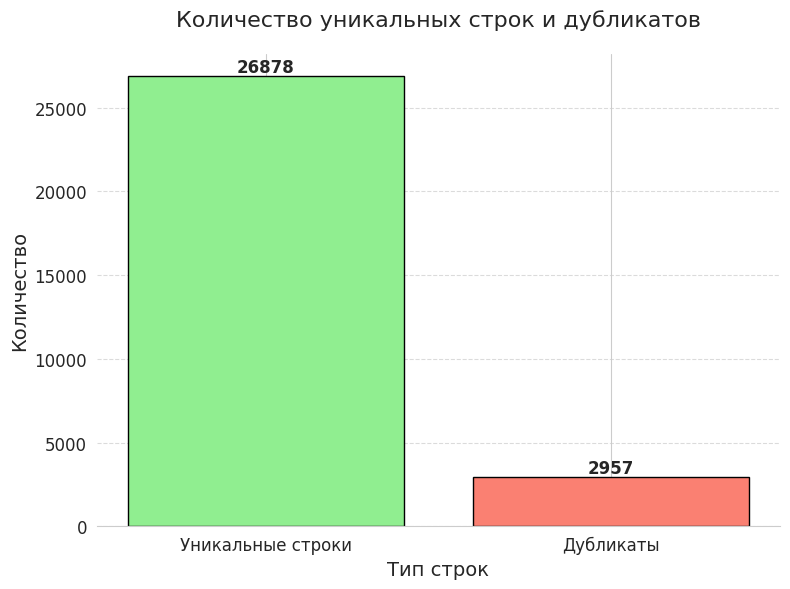

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подсчет дубликатов
duplicates_count = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates_count}")

# Подсчет уникальных и дублированных строк
unique_count = len(df) - duplicates_count
labels = ['Уникальные строки', 'Дубликаты']
values = [unique_count, duplicates_count]

# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Построение bar plot
bars = plt.bar(labels, values, color=['lightgreen', 'salmon'], edgecolor='black')

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Настройка заголовка и подписей
plt.title('Количество уникальных строк и дубликатов', fontsize=16, pad=20)
plt.xlabel('Тип строк', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Улучшение внешнего вида
sns.despine(left=True)  # Убираем левую границу
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку только по оси Y

# Показать график
plt.tight_layout()
plt.show()

# Анализ данных

### Распределения цен за квартиры и за м2

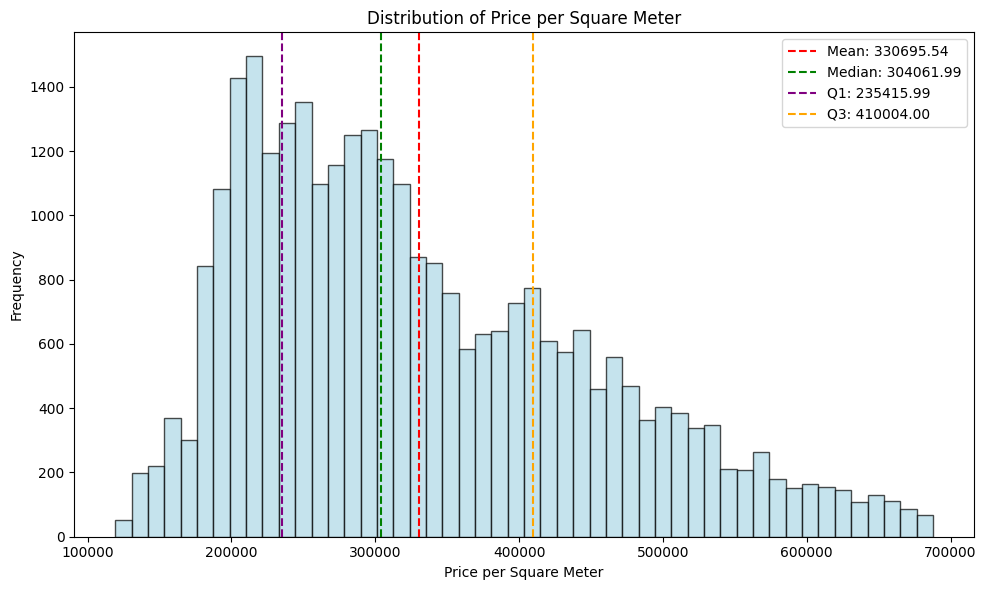

In [23]:
# Plot histogram with additional statistical values
plt.figure(figsize=(10, 6))
plt.hist(df['price_per_meter'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')

# Calculate statistical values
mean_price_per_meter = df['price_per_meter'].mean()
median_price_per_meter = df['price_per_meter'].median()
q1_meter = df['price_per_meter'].quantile(0.25)
q3_meter = df['price_per_meter'].quantile(0.75)

# Add vertical lines for statistical values
plt.axvline(mean_price_per_meter, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_price_per_meter:.2f}')
plt.axvline(median_price_per_meter, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_price_per_meter:.2f}')
plt.axvline(q1_meter, color='purple', linestyle='dashed', linewidth=1.5, label=f'Q1: {q1_meter:.2f}')
plt.axvline(q3_meter, color='orange', linestyle='dashed', linewidth=1.5, label=f'Q3: {q3_meter:.2f}')

# Set labels and legend
plt.title('Distribution of Price per Square Meter')
plt.xlabel('Price per Square Meter')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

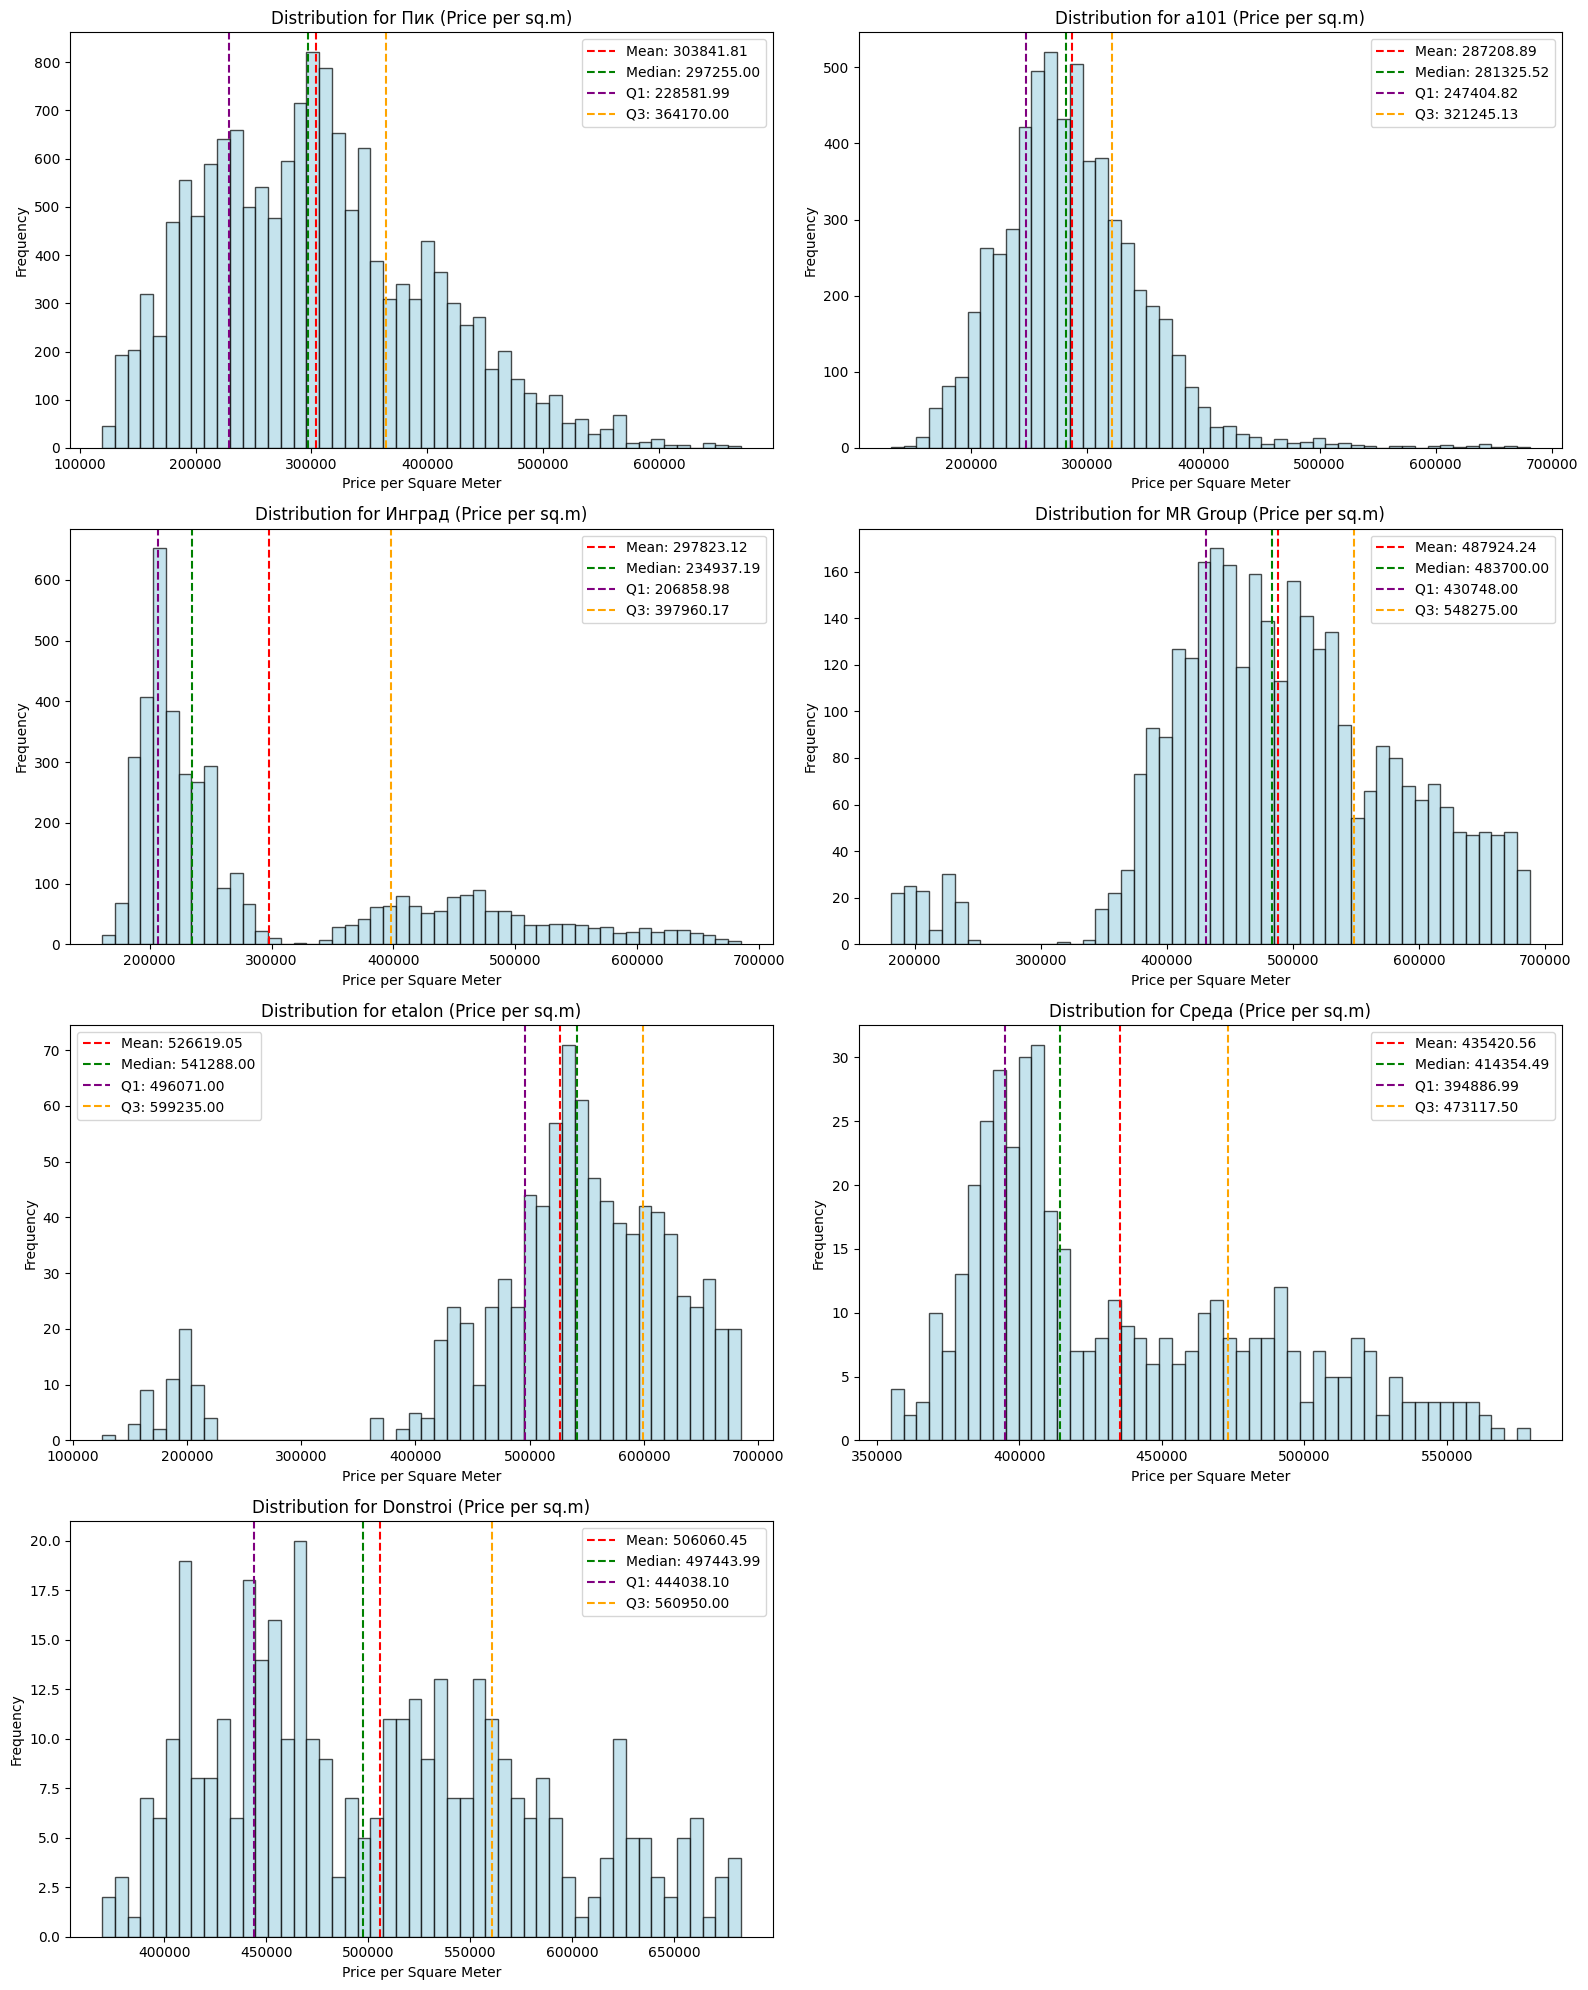

In [55]:
developers = df['developer'].value_counts().index
n_developers = len(developers)
cols = 2
rows = (n_developers // cols) + (n_developers % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))
axes = axes.flatten()

# Loop through each developer for plotting
for i, developer in enumerate(developers):
    developer_data = df[df['developer'] == developer]['price_per_meter']
    
    axes[i].hist(developer_data, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    
    mean_val = developer_data.mean()
    median_val = developer_data.median()
    q1 = developer_data.quantile(0.25)
    q3 = developer_data.quantile(0.75)

    axes[i].axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')
    axes[i].axvline(q1, color='purple', linestyle='dashed', linewidth=1.5, label=f'Q1: {q1:.2f}')
    axes[i].axvline(q3, color='orange', linestyle='dashed', linewidth=1.5, label=f'Q3: {q3:.2f}')
    
    axes[i].set_title(f'Distribution for {developer} (Price per sq.m)', fontsize=12)
    axes[i].set_xlabel('Price per Square Meter')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [13]:
import plotly.express as px

# Сгруппируем данные по жилым комплексам
jkc_data = df.groupby('complex').agg({
    'price_per_meter': 'mean',
    'lat': 'mean',
    'lon': 'mean',
    'complex': 'size'
}).rename(columns={'complex': 'count'}).reset_index()

# Построение интерактивной карты
fig = px.scatter_mapbox(
    jkc_data,
    lat='lat',
    lon='lon',
    size='count',  # размер круга будет соответствовать числу квартир
    color='price_per_meter',  # цвет круга будет соответствовать средней стоимости метра
    hover_name='complex',  # отображение названия ЖК при наведении
    hover_data={'price_per_meter': True, 'count': True},
    color_continuous_scale=px.colors.sequential.Viridis,
    title="Карта жилых комплексов: средняя стоимость метра и количество квартир"
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":0,"l":0,"b":0},
    height=700
)

fig.show()

/tmp/ipykernel_227/2920246202.py:12: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


Гистограммы распределения цен за м² построены как для общего анализа, так и для каждого застройщика с указанием среднего значения и медианы.

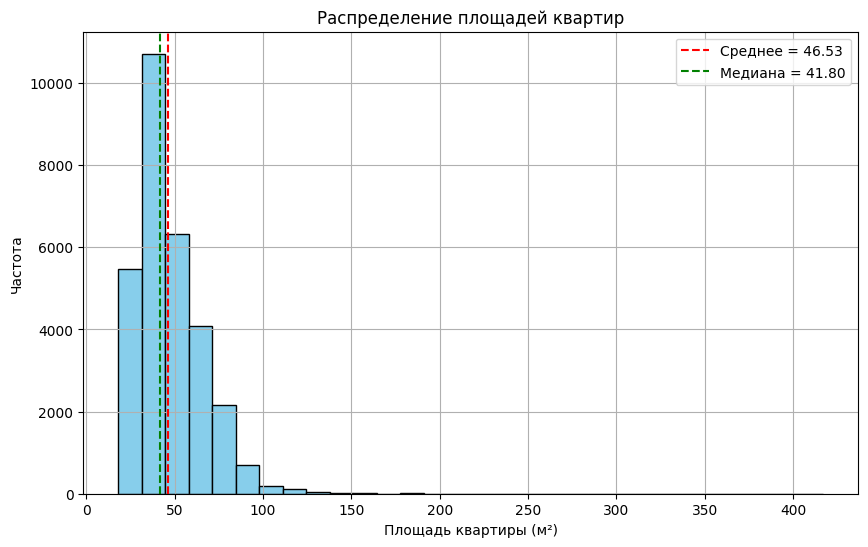

In [17]:
# Общий анализ распределения площадей квартир
filtered_price_per_meter_df=df
mean_area = filtered_price_per_meter_df['area'].mean()
median_area = filtered_price_per_meter_df['area'].median()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(filtered_price_per_meter_df['area'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_area, color='red', linestyle='--', label=f'Среднее = {mean_area:.2f}')
plt.axvline(median_area, color='green', linestyle='--', label=f'Медиана = {median_area:.2f}')
plt.title('Распределение площадей квартир')
plt.xlabel('Площадь квартиры (м²)')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_227/1750423337.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



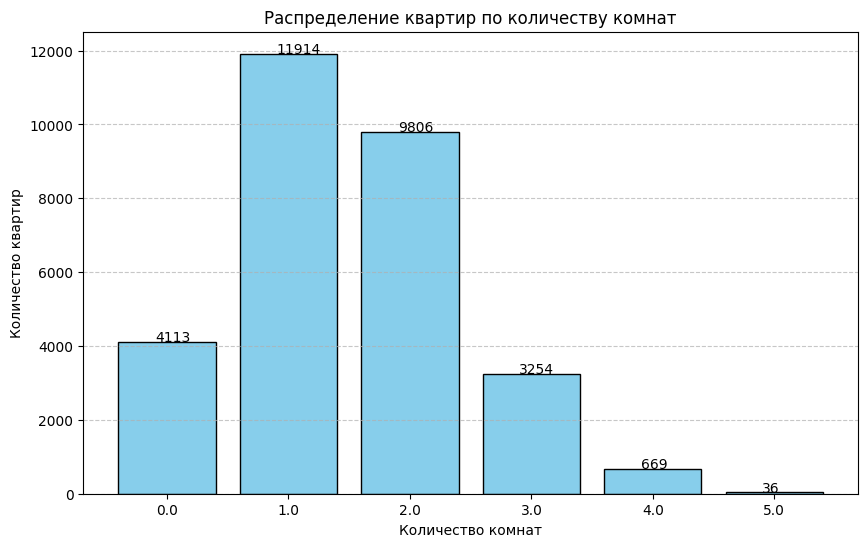

In [25]:
# Преобразуем значения в стоблце 'rooms' в числовой тип, игнорируя ошибки
filtered_price_per_meter_df['rooms'] = pd.to_numeric(filtered_price_per_meter_df['rooms'], errors='coerce')

# Перезапустим построение диаграммы
room_counts = filtered_price_per_meter_df['rooms'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(room_counts.index.astype(str), room_counts.values, color='skyblue', edgecolor='black')

# Добавление значений на вершины столбцов
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2 - 0.1,
        bar.get_height() + 5,
        str(bar.get_height()),
        fontsize=10, color='black'
    )

plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

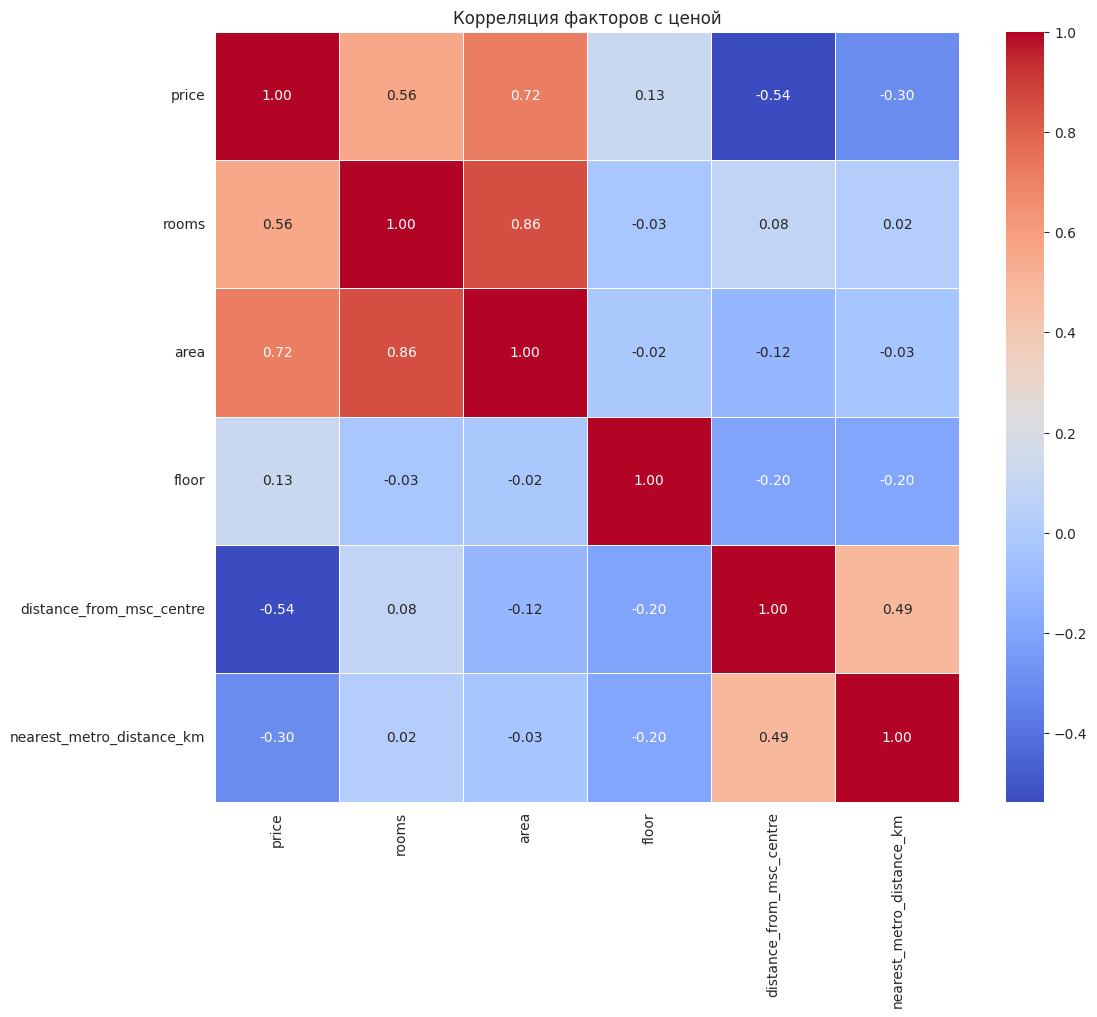

In [81]:
import seaborn as sns
plt.figure(figsize=(12, 10))

# Выбор интересующих нас факторов и цены
correlation_features = [
    'price', 'rooms', 'area', 'floor', 'distance_from_msc_centre', 'nearest_metro_distance_km']

# Убираем строки с пропущенными значениями в этих колонках
correlation_data = filtered_price_per_meter_df[correlation_features].dropna()

# Преобразовываем необходимые столбцы в числовой тип
correlation_data['floor'] = pd.to_numeric(correlation_data['floor'], errors='coerce')

# Построение корреляционной карты
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", lw=0.5)
plt.title('Корреляция факторов с ценой')
plt.show()

In [33]:
from scipy.interpolate import griddata
import numpy as np
# Данные для интерполяции
latitudes = jkc_data['lat']
longitudes = jkc_data['lon']
values = jkc_data['price_per_meter']

# Создаем равномерную сетку для карты
grid_lat, grid_lon = np.meshgrid(
    np.linspace(latitudes.min(), latitudes.max(), 200),
    np.linspace(longitudes.min(), longitudes.max(), 200)
)

# Интерполяция значений для сетки
grid_values = griddata(
    (latitudes, longitudes), values, (grid_lat, grid_lon), method='linear'
)

# Построение карты с использованием Plotly
import plotly.graph_objects as go

fig = go.Figure()

# Добавляем слой с интерполированной сеткой
fig.add_trace(go.Contour(
    z=grid_values,
    x=grid_lon[0],
    y=grid_lat[:, 0],
    colorscale="Viridis",
    colorbar=dict(title="Цена за м²"),
    contours=dict(
        start=values.min(),
        end=values.max(),
        size=(values.max() - values.min()) / 10  # Группироваем цену на 10 групп
    )
))

# Добавляем точки для ЖК
fig.add_trace(go.Scatter(
    x=longitudes,
    y=latitudes,
    mode='markers',
    marker=dict(size=8, color=values, colorscale="Viridis", showscale=False),
    text=jkc_data[['complex', 'count']].apply(lambda x: f"{x[0]}: {x[1]} квартир", axis=1),
    hoverinfo="text"
))

fig.update_layout(
    mapbox_style="open-street-map",
    title="Распределение цен за м² на карте",
    xaxis_title="Долгота",
    yaxis_title="Широта",
    height=800
)

fig.show()

/tmp/ipykernel_227/1341472926.py:44: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



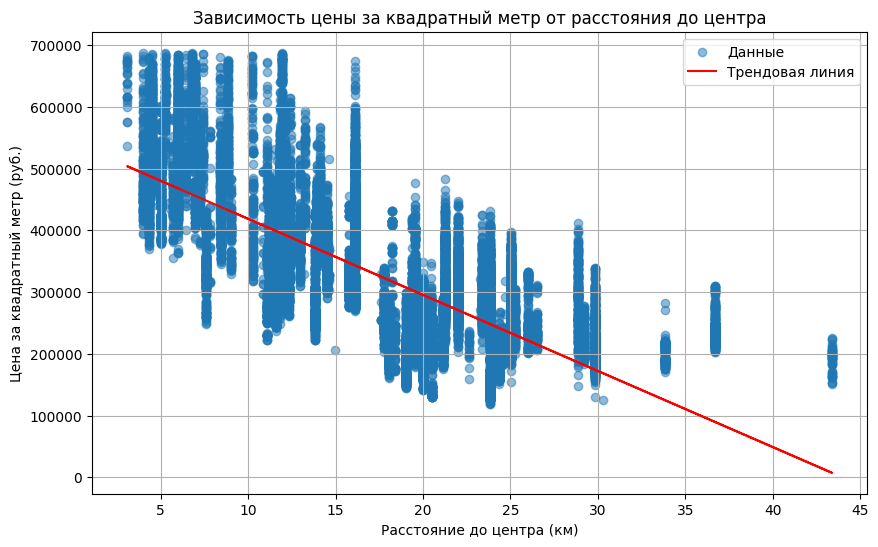

In [35]:
# Построение графика зависимости цены за квадратный метр от расстояния до центра
plt.figure(figsize=(10, 6))
plt.scatter(filtered_price_per_meter_df['distance_from_msc_centre'], filtered_price_per_meter_df['price_per_meter'], alpha=0.5, label='Данные')

# Построение трендовой линии для этой зависимости
z = np.polyfit(filtered_price_per_meter_df['distance_from_msc_centre'], filtered_price_per_meter_df['price_per_meter'], 1)
p = np.poly1d(z)
plt.plot(filtered_price_per_meter_df['distance_from_msc_centre'], p(filtered_price_per_meter_df['distance_from_msc_centre']), color='red', label='Трендовая линия')

plt.title('Зависимость цены за квадратный метр от расстояния до центра')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Цена за квадратный метр (руб.)')
plt.legend()
plt.grid()
plt.show()

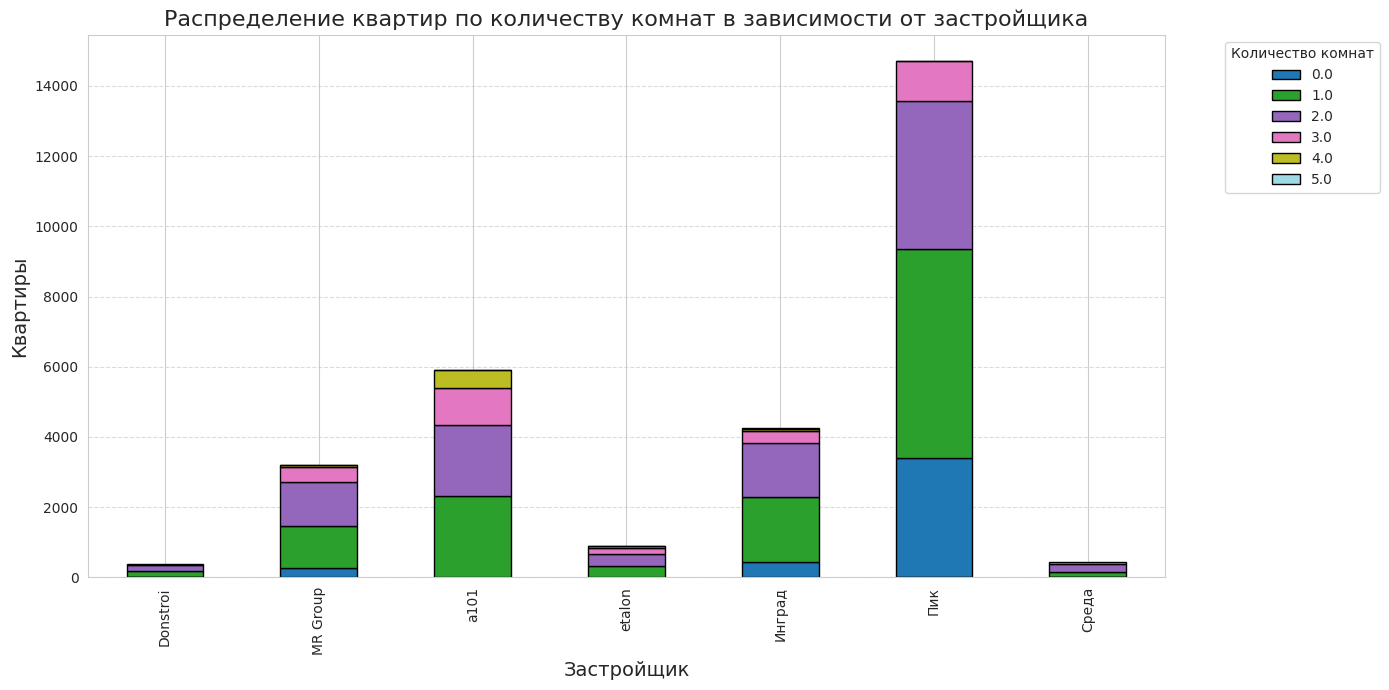

In [91]:
import seaborn as sns
developers_data = df
# Подсчет количества квартир каждого типа у каждого застройщика
room_distribution = developers_data.groupby(['developer', 'rooms']).size().unstack(fill_value=0)
#room_distribution['Всего квартир'] = room_distribution.sum(axis=1)

# Построение графика
#room_distribution_percent = room_distribution.div(room_distribution['Всего квартир'], axis=0) * 100

ax = room_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20',
    edgecolor='black'
)

ax.set_title('Распределение квартир по количеству комнат в зависимости от застройщика', fontsize=16)
ax.set_ylabel('Квартиры', fontsize=14)
ax.set_xlabel('Застройщик', fontsize=14)
ax.legend(title='Количество комнат', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

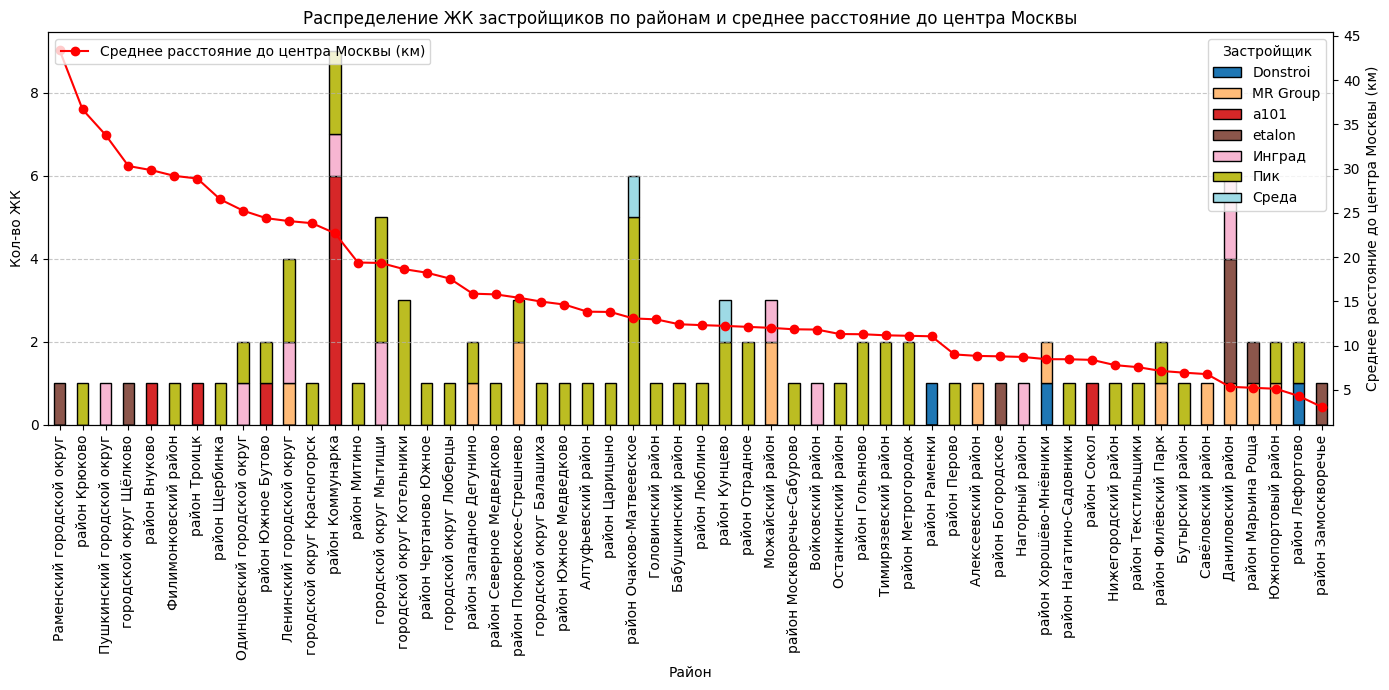

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

complex_distribution = df.groupby(['geodistrict', 'developer'])['complex'].nunique().unstack(fill_value=0)
distance_data = df.groupby('geodistrict')['distance_from_msc_centre'].mean()
sorted_districts = distance_data.sort_values(ascending=False).index
complex_distribution = complex_distribution.reindex(sorted_districts)
fig, ax1 = plt.subplots(figsize=(14, 7))

complex_distribution.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    colormap='tab20',
    edgecolor='black',
    legend=False
)

ax1.set_title('Распределение ЖК застройщиков по районам и среднее расстояние до центра Москвы')
ax1.set_ylabel('Кол-во ЖК')
ax1.set_xlabel('Район')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), distance_data.reindex(sorted_districts), color='red', marker='o', label='Среднее расстояние до центра Москвы (км)')
ax2.set_ylabel('Среднее расстояние до центра Москвы (км)')
ax2.legend(loc='upper left')

ax1.legend(title='Застройщик', loc='upper right')
plt.tight_layout()
plt.show()

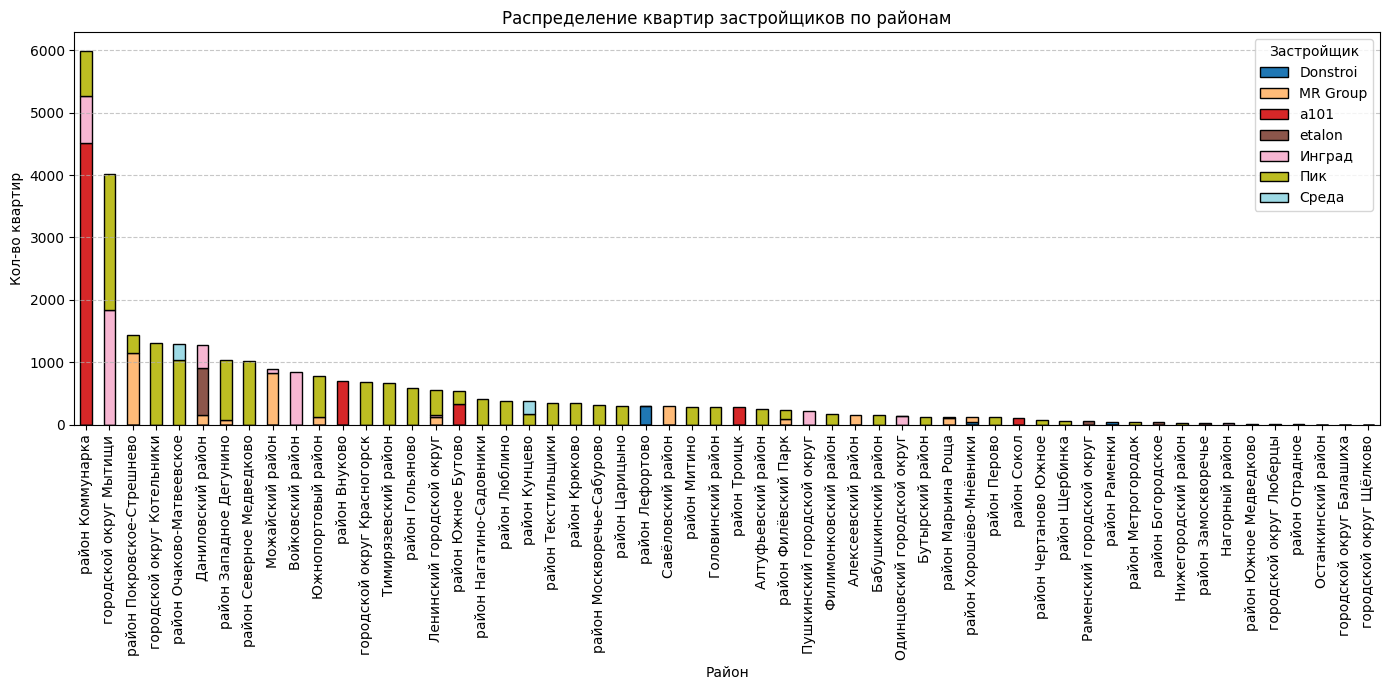

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

room_distribution = df.groupby(['geodistrict', 'developer']).size().unstack(fill_value=0)
sorted_room_distribution = room_distribution.sum(axis=1).sort_values(ascending=False)
room_distribution = room_distribution.loc[sorted_room_distribution.index]

ax = room_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20',
    edgecolor='black'
)

ax.set_title('Распределение квартир застройщиков по районам')
ax.set_ylabel('Кол-во квартир')
ax.set_xlabel('Район')
ax.legend(title='Застройщик', loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


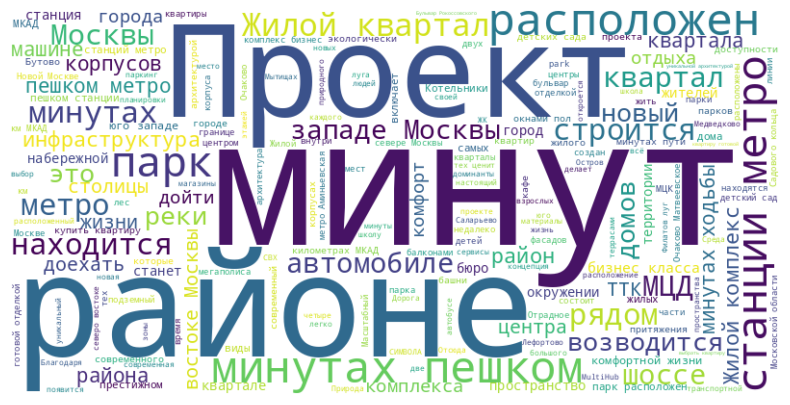

In [49]:
!pip install nltk
!pip install wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))
df_words = df[['complex', 'description_complex']].drop_duplicates().dropna()

descriptions = ' '.join(df_words['description_complex'])


words = [word for word in descriptions.split() if word.lower() not in stop_words]
text = ' '.join(words)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

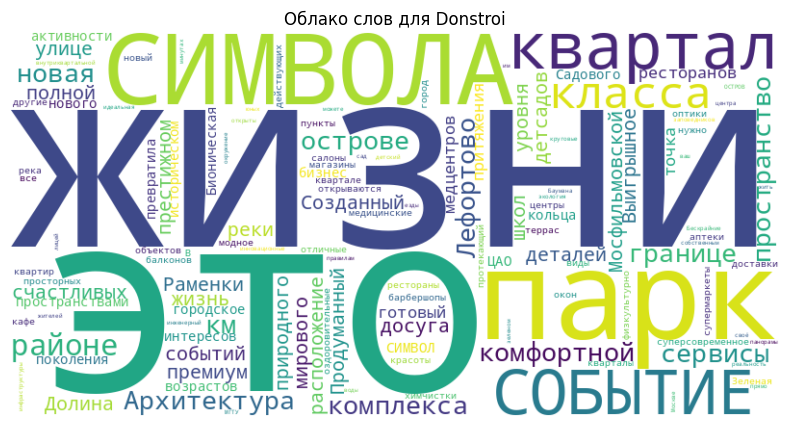

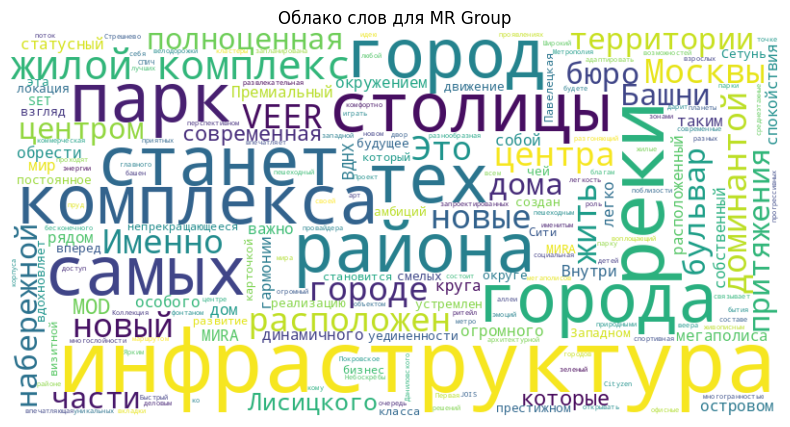

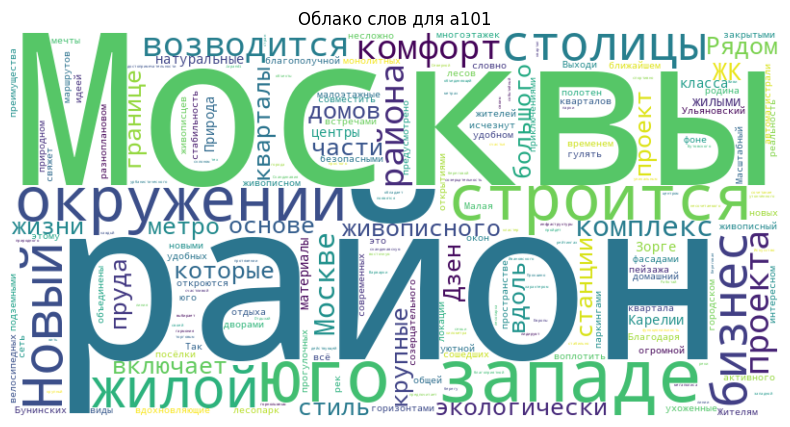

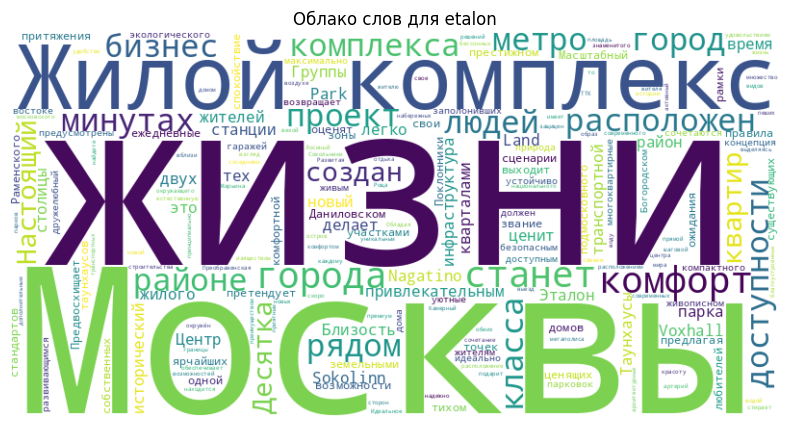

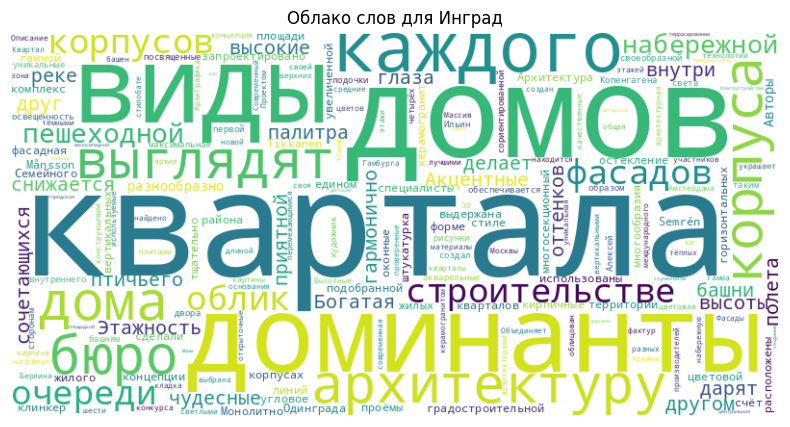

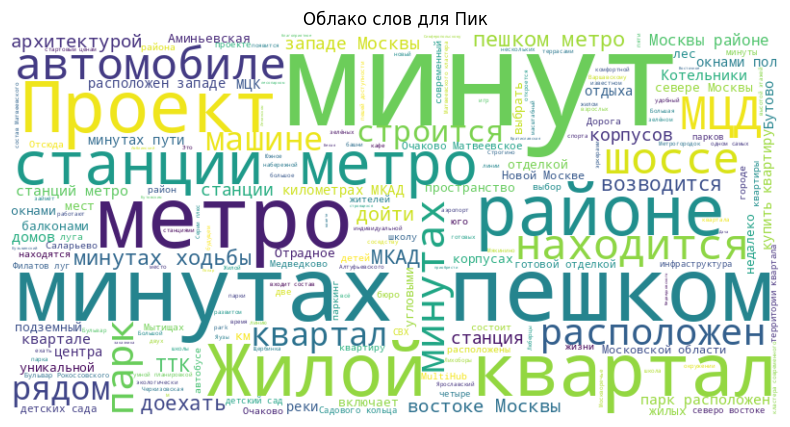

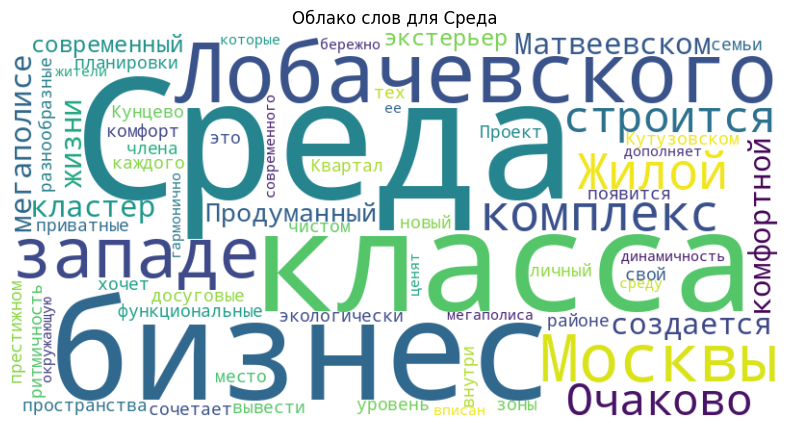

In [51]:
grouped = df.groupby('developer')

for developer, group in grouped:
    df_words = group[['complex', 'description_complex']].drop_duplicates().dropna()

    descriptions = ' '.join(df_words['description_complex'])


    words = [word for word in descriptions.split() if word.lower() not in stop_words]
    text = ' '.join(words)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


    plt.figure(figsize=(10, 5))
    plt.title(f"Облако слов для {developer}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

/tmp/ipykernel_227/1220023855.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_227/1220023855.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



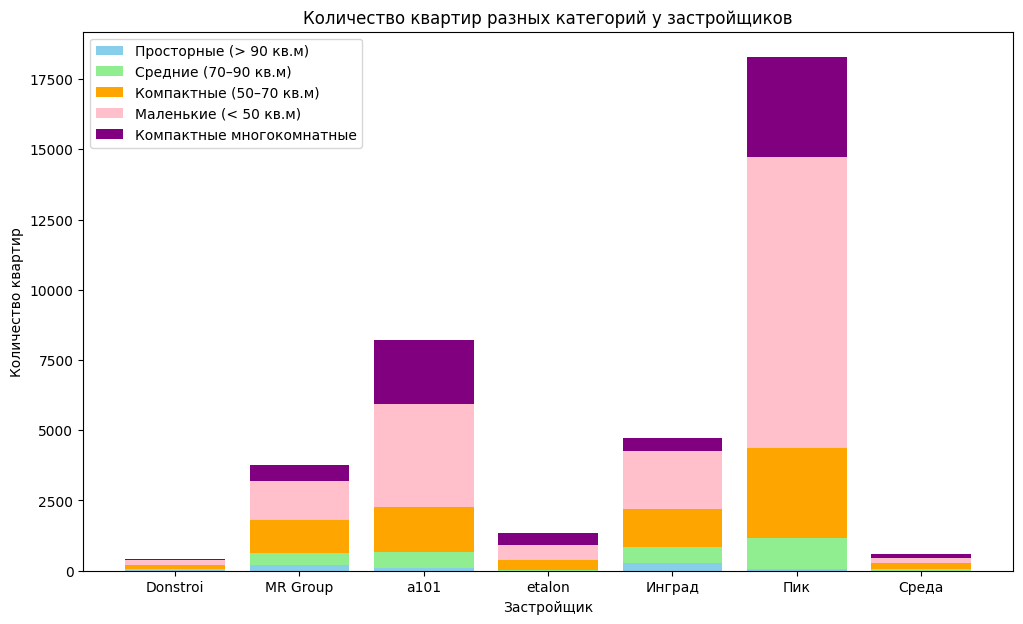

In [59]:


df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')


categories = df.assign(
    is_large=df['area'] > 90,  # Просторные квартиры
    is_medium_large=(df['area'] >= 70) & (df['area'] <= 90),  # Средние квартиры
    is_medium=(df['area'] >= 50) & (df['area'] < 70),  # Компактные квартиры
    is_small=df['area'] < 50,  # Маленькие квартиры
    is_compact_multiroom=(df['area'] < 60) & (df['rooms'] > 1)  # Компактные многокомнатные
).groupby('developer').agg(
    large_count=('is_large', 'sum'),
    medium_large_count=('is_medium_large', 'sum'),
    medium_count=('is_medium', 'sum'),
    small_count=('is_small', 'sum'),
    compact_multiroom_count=('is_compact_multiroom', 'sum'),
).reset_index()


plt.figure(figsize=(12, 7))
x = categories['developer']


plt.bar(x, categories['large_count'], label='Просторные (> 90 кв.м)', color='skyblue')
plt.bar(x, categories['medium_large_count'], bottom=categories['large_count'], label='Средние (70–90 кв.м)', color='lightgreen')
plt.bar(x, categories['medium_count'], bottom=categories['large_count'] + categories['medium_large_count'], label='Компактные (50–70 кв.м)', color='orange')
plt.bar(x, categories['small_count'], bottom=categories['large_count'] + categories['medium_large_count'] + categories['medium_count'], label='Маленькие (< 50 кв.м)', color='pink')
plt.bar(x, categories['compact_multiroom_count'], bottom=categories['large_count'] + categories['medium_large_count'] + categories['medium_count'] + categories['small_count'], label='Компактные многокомнатные', color='purple')


plt.title('Количество квартир разных категорий у застройщиков')
plt.xlabel('Застройщик')
plt.ylabel('Количество квартир')
plt.legend()
plt.show()

/tmp/ipykernel_227/1718947992.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



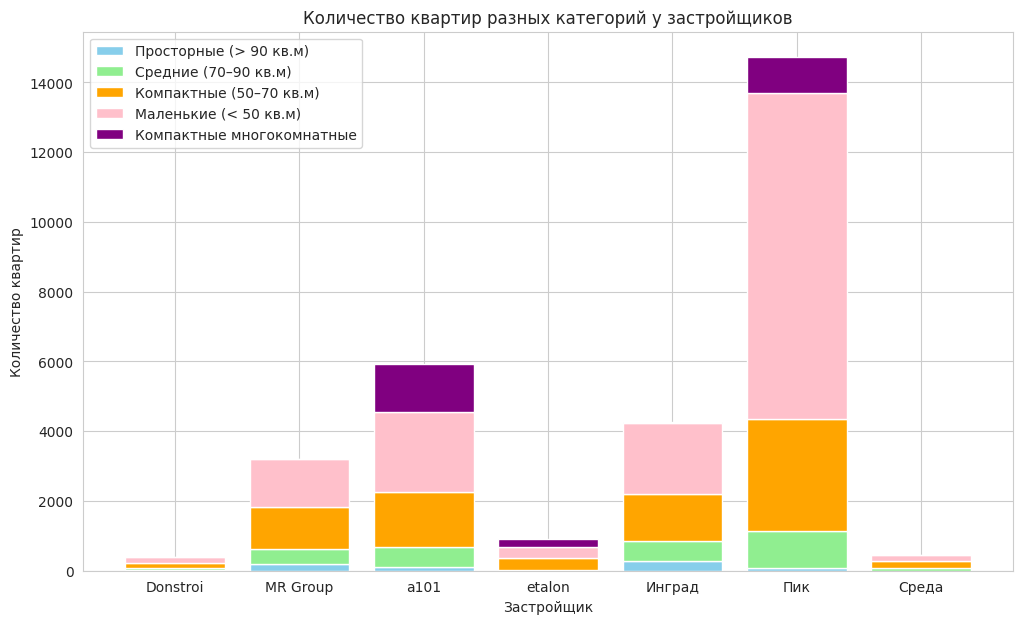

In [79]:
def categories(row):
    if (row['area'] < 60) and (row['rooms'] > 1):
        return 'compact_multiroom'
    elif row['area'] > 90:
        return 'large'
    elif row['area'] >= 70:
        return 'medium_large'
    elif row['area'] >= 50:
        return 'medium'
    else:
        return 'small'

df['category'] = df.apply(categorize, axis=1)

categories = df.groupby(['developer', 'category']).size().unstack(fill_value=0).reset_index()

categories['total_flats'] = categories.sum(axis=1, numeric_only=True)

plt.figure(figsize=(12, 7))
x = categories['developer']


plt.bar(x, categories['large'], label='Просторные (> 90 кв.м)', color='skyblue')
plt.bar(x, categories['medium_large'], bottom=categories['large'], label='Средние (70–90 кв.м)', color='lightgreen')
plt.bar(x, categories['medium'], bottom=categories['large'] + categories['medium_large'], label='Компактные (50–70 кв.м)', color='orange')
plt.bar(x, categories['small'], bottom=categories['large'] + categories['medium_large'] + categories['medium'], label='Маленькие (< 50 кв.м)', color='pink')
plt.bar(x, categories['compact_multiroom'], bottom=categories['large'] + categories['medium_large'] + categories['medium'] + categories['small'], label='Компактные многокомнатные', color='purple')

plt.title('Количество квартир разных категорий у застройщиков')
plt.xlabel('Застройщик')
plt.ylabel('Количество квартир')
plt.legend()
plt.show()


/tmp/ipykernel_227/1039255521.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

category developer  compact_multiroom  large  medium  medium_large  small  \
0         Donstroi                  0      8     143            65    167   
1         MR Group                  3    186    1198           435   1373   
2             a101               1361    112    1582           572   2294   
3           etalon                237      2     336            33    297   
4           Инград                 30    288    1340           559   2053   
5              Пик               1015     70    3213          1081   9340   
6            Среда                  0      5     204            68    165   

category  total_flats  compact_multiroom_ratio  large_ra

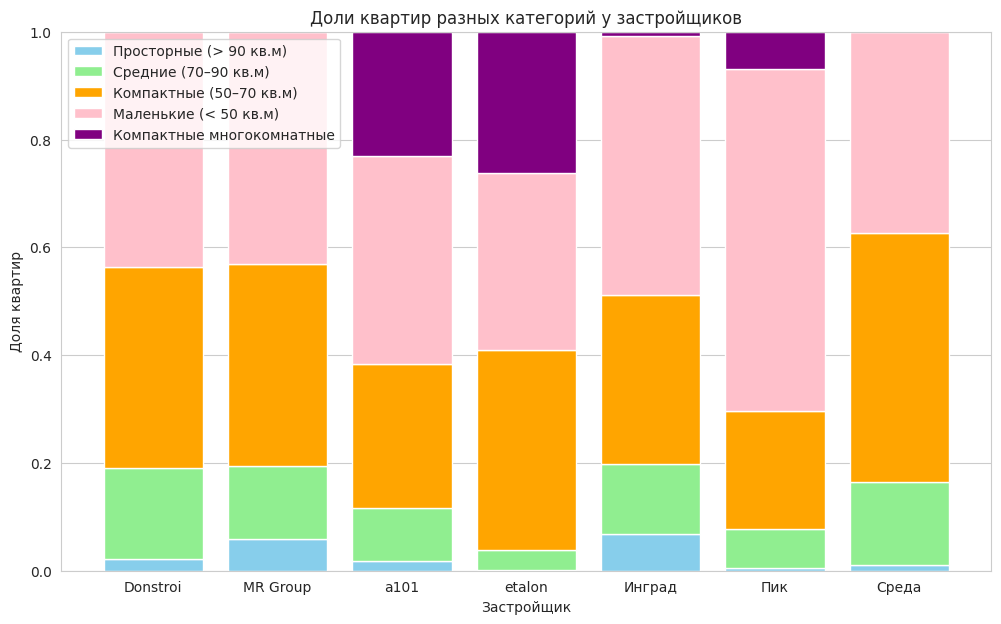

In [75]:
def categories(row):
    if (row['area'] < 60) and (row['rooms'] > 1):
        return 'compact_multiroom'
    elif row['area'] > 90:
        return 'large'
    elif row['area'] >= 70:
        return 'medium_large'
    elif row['area'] >= 50:
        return 'medium'
    else:
        return 'small'

df['category'] = df.apply(categorize, axis=1)


categories = df.groupby(['developer', 'category']).size().unstack(fill_value=0).reset_index()


categories['total_flats'] = categories.sum(axis=1, numeric_only=True)


for column in categories.columns[1:-1]:  # Пропускаем 'developer' и 'total_flats'
    categories[f'{column}_ratio'] = categories[column] / categories['total_flats']

plt.figure(figsize=(12, 7))
x = categories['developer']


plt.bar(x, categories['large_ratio'], label='Просторные (> 90 кв.м)', color='skyblue')
plt.bar(x, categories['medium_large_ratio'], bottom=categories['large_ratio'], label='Средние (70–90 кв.м)', color='lightgreen')
plt.bar(x, categories['medium_ratio'], bottom=categories['large_ratio'] + categories['medium_large_ratio'], label='Компактные (50–70 кв.м)', color='orange')
plt.bar(x, categories['small_ratio'], bottom=categories['large_ratio'] + categories['medium_large_ratio'] + categories['medium_ratio'], label='Маленькие (< 50 кв.м)', color='pink')
plt.bar(x, categories['compact_multiroom_ratio'], bottom=categories['large_ratio'] + categories['medium_large_ratio'] + categories['medium_ratio'] + categories['small_ratio'], label='Компактные многокомнатные', color='purple')


plt.title('Доли квартир разных категорий у застройщиков')
plt.xlabel('Застройщик')
plt.ylabel('Доля квартир')
plt.legend()
plt.show()

In [107]:

# Построение корреляционной карты
correlation_matrix = df.numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", lw=0.5)
plt.title('Корреляция факторов с ценой')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'numeric'

/tmp/ipykernel_227/1466103133.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




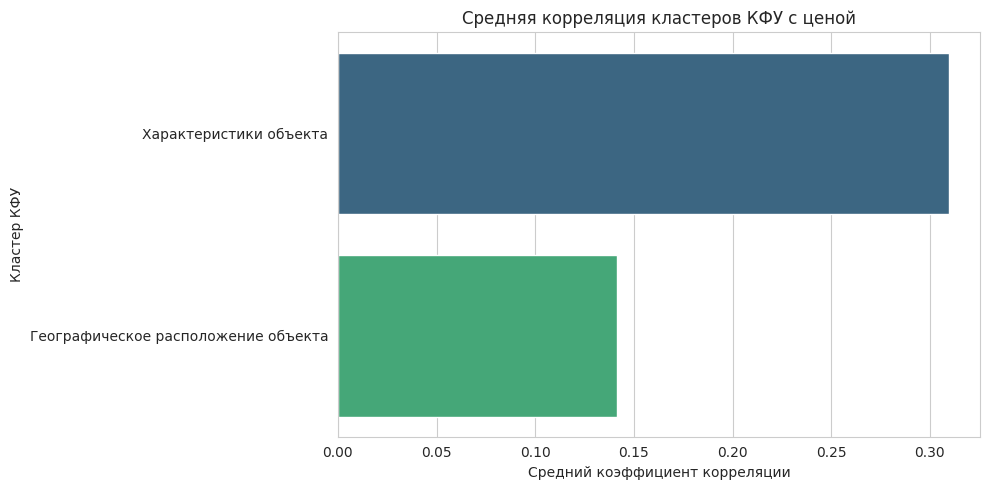

In [97]:

clusters = {
    # 'Питание и развлечения': ['cafe_count', 'restaurant_count'],
    # 'Семейная инфраструктура': ['kindergarten_count', 'pharmacy_count', 'school_count'],
    'Характеристики объекта': ['area', 'floor', 'rooms'],
    'Географическое расположение объекта': ['distance_from_msc_centre', 'nearest_metro_distance_km']
}

# Средняя корреляция по кластерам
cluster_avg = {}
for cluster, features in clusters.items():
    avg_corr = np.mean([correlation_matrix[f] for f in features])
    cluster_avg[cluster] = avg_corr

# Визуализация по кластерам
df_clusters = pd.DataFrame(list(cluster_avg.items()), columns=['Cluster', 'Average Correlation'])
df_clusters = df_clusters.sort_values('Average Correlation', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Average Correlation', y='Cluster', data=df_clusters, palette='viridis')
plt.title('Средняя корреляция кластеров КФУ с ценой')
plt.xlabel('Средний коэффициент корреляции')
plt.ylabel('Кластер КФУ')
plt.tight_layout()
plt.show()

In [89]:
correlation_matrix

price     rooms      area     floor  \
price                      1.000000  0.559106  0.717248  0.125820   
rooms                      0.559106  1.000000  0.859560 -0.032640   
area                       0.717248  0.859560  1.000000 -0.017345   
floor                      0.125820 -0.032640 -0.017345  1.000000   
distance_from_msc_centre  -0.536980  0.083110 -0.115628 -0.201504   
nearest_metro_distance_km -0.297289  0.024518 -0.034826 -0.198930   

                           distance_from_msc_centre  nearest_metro_distance_km  
price                                     -0.536980                  -0.297289  
rooms                                      0.083110                   0.024518  
area                                      -0.115628                  -0.034826  
floor                                     -0.201504                  -0.198930  
distance_from_msc_centre                   1.000000                   0.487837  
nearest_metro_distance_km                  0.487837                   1.000000

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e74441ca-140e-4d56-b638-3a989487e5bf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>